<a href="https://colab.research.google.com/github/akshaytripathi09/TITANIC-DATASET-USING-KNN-MODEL/blob/main/KNN_TITANIC_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TITANIC DATASET USING KNN

In [ ]:
# IMPORT LIBRARIES...

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Function to create piechart

def create_piechart(data, column):
  labels = list(data[column].value_counts().to_dict().keys())
  sizes = list(data[column].value_counts().to_dict().values())

  plt.pie(sizes,
          labels= labels,
          autopct='%1.2f%%',
          shadow=False,
          startangle=45)
  plt.axis('equal')
  plt.title("Piechart - {}".format(column))
  plt.show()

  #Function to show missing data

  def missing_data(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent= round((df.isnull().sum()/df.isnull().count() *100).sort_values(ascending=False),2)

    data_type = df.types
    missing_data = pd.concat([total,percent,data_type],
                             axis =1,
                             keys = ['Total','Percent','Data_Type']).sort_values("Total",
                                                                                 axis = 0,
                                                                                 ascending = False)
    return missing_data

In [ ]:
# LOAD DATASETS
# Reading training & testing data
train_df = pd.read_excel('Titanic_Survival_Train.xls',
                         index_col=0,
                         header=0)
test_df = pd.read_excel('Titanic_Survival_Test.xls',
                        index_col=0,
                        header=0)
print(train_df.shape)
print(test_df.shape)


(891, 11)
(21, 11)


In [ ]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

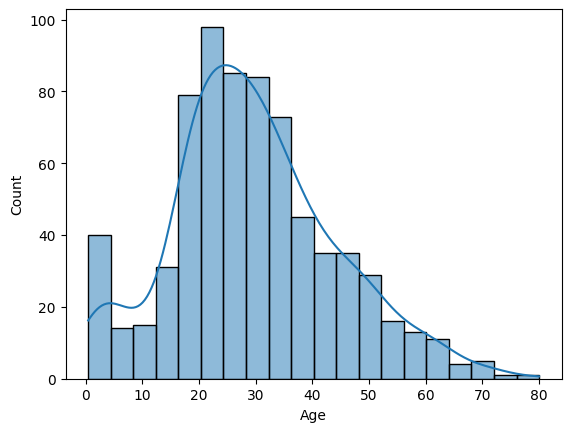

In [ ]:
# EDA
# Plot Histogram
sns.histplot(data = train_df, x = "Age", kde = True)
plt.show()

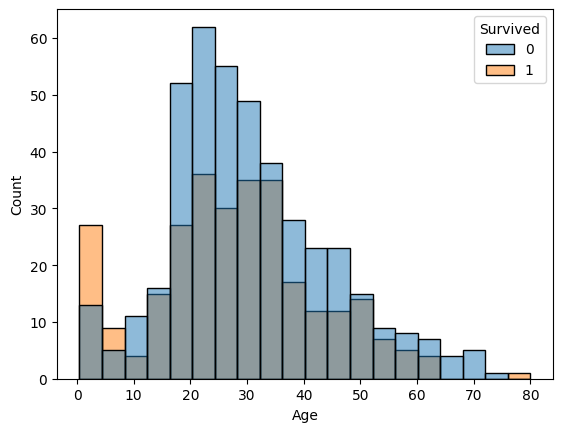

In [ ]:
sns.histplot(data = train_df,
             x = "Age",
             kde = False,
             hue = "Survived",
             element="bars")
plt.show()

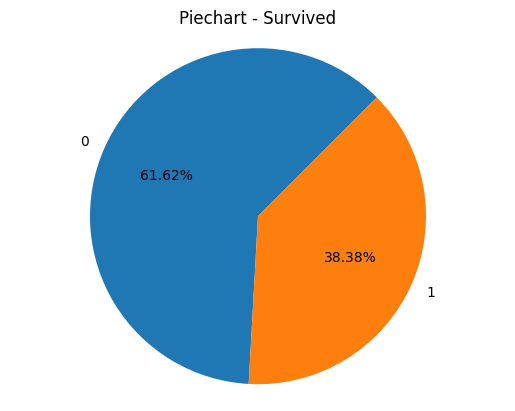

In [ ]:
create_piechart(train_df, "Survived")

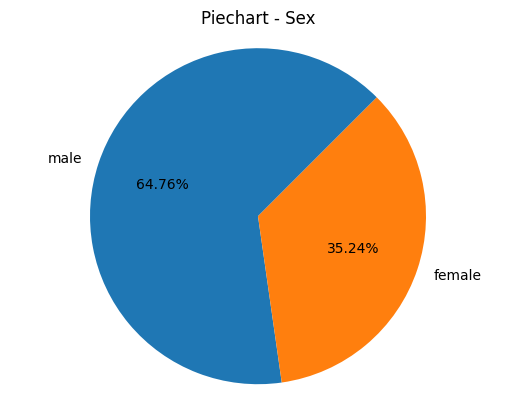

In [ ]:
create_piechart(train_df, "Sex")

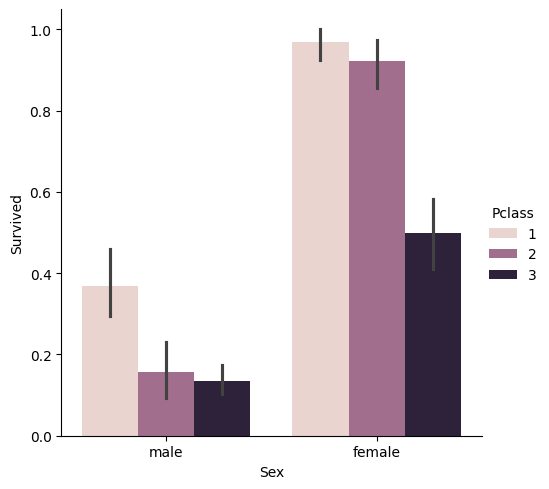

In [ ]:
sns.catplot(data=train_df,
            x = "Sex",
            y= "Survived",
            hue = "Pclass",
            kind = "bar")
plt.show()

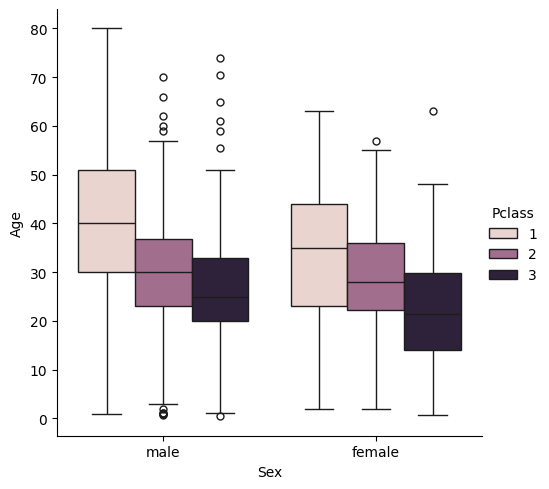

In [ ]:
sns.catplot(data=train_df,
              x="Sex",
              y="Age",
              hue="Pclass",
              kind="box")
plt.show()

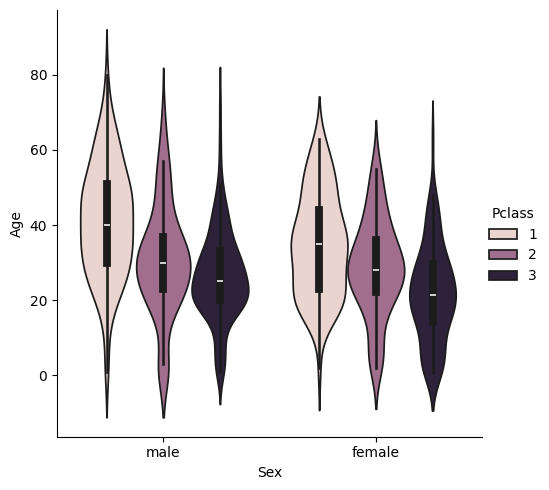

In [ ]:
sns.catplot(data=train_df,
              x="Sex",
              y="Age",
              hue="Pclass",
              kind="violin")
plt.show()

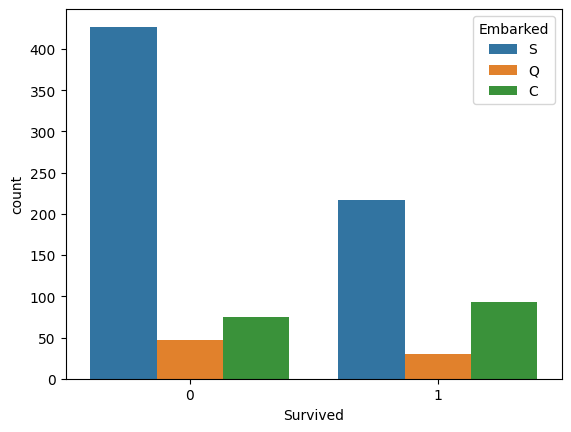

In [ ]:
sns.countplot(x="Survived",hue="Embarked",data=train_df)
plt.show()

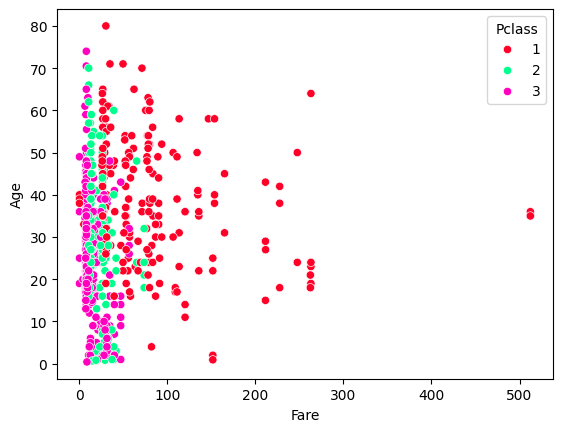

In [ ]:
sns.scatterplot(data=train_df,
                x="Fare",
                y="Age",
                hue="Pclass",
                palette="gist_rainbow")
plt.show()

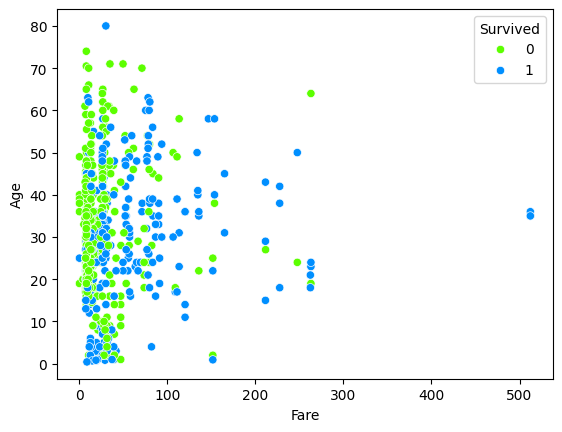

In [ ]:
sns.scatterplot(data=train_df,
                x="Fare",
                y="Age",
                hue="Survived",
                palette="gist_rainbow")
plt.show()

In [ ]:
# DATA PREPROCESSING

train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Feature Selection
train_df = train_df[['Name','Pclass','Sex','Age','Survived']]

test_df = test_df[['Name','Pclass','Sex','Age','Survived']]

In [ ]:
# Finding the missing Values
print(train_df.isnull().sum())
print()
print(test_df.isnull().sum())

Name          0
Pclass        0
Sex           0
Age         177
Survived      0
dtype: int64

Name        0
Pclass      0
Sex         0
Age         2
Survived    0
dtype: int64


In [ ]:
# Imputing numerical missing data with mean value
train_df["Age"].fillna(train_df["Age"].mean(), inplace=True)

# Imputing numerical missing data with mean value
test_df["Age"].fillna(test_df["Age"].mean(), inplace=True)

<ipython-input-19-916ca53a5fc4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["Age"].fillna(train_df["Age"].mean(), inplace=True)


In [ ]:
# Finding missing values
print(train_df.isnull().sum())
print()
print(test_df.isnull().sum())

Name        0
Pclass      0
Sex         0
Age         0
Survived    0
dtype: int64

Name        0
Pclass      0
Sex         0
Age         0
Survived    0
dtype: int64


In [ ]:
train_df["Sex"]=train_df["Sex"].map({"male":0,"female":1})
test_df["Sex"]=test_df["Sex"].map({"male":0,"female":1})

<ipython-input-21-5e38ce60e1a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["Sex"]=train_df["Sex"].map({"male":0,"female":1})


In [ ]:
train_df.head()

,Name,Pclass,Sex,Age,Survived
PassengerId,,,,,
1,"Braund, Mr. Owen Harris",3,0,22.0,0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,38.0,1
3,"Heikkinen, Miss. Laina",3,1,26.0,1
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,35.0,1
5,"Allen, Mr. William Henry",3,0,35.0,0


In [ ]:
test_df.head(23)

,Name,Pclass,Sex,Age,Survived
PassengerId,,,,,
871,"Balkic, Mr. Cerin",3,0,26.000000,0
872,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",1,1,47.000000,1
873,"Carlsson, Mr. Frans Olof",1,0,33.000000,0
874,"Vander Cruyssen, Mr. Victor",3,0,47.000000,0
875,"Abelson, Mrs. Samuel (Hannah Wizosky)",2,1,28.000000,1
876,"Najib, Miss. Adele Kiamie ""Jane""",3,1,15.000000,1
877,"Gustafsson, Mr. Alfred Ossian",3,0,20.000000,0
878,"Petroff, Mr. Nedelio",3,0,19.000000,0
879,"Laleff, Mr. Kristo",3,0,29.842105,0


In [ ]:
X_train=train_df.values[:870, 1:-1]
y_train=train_df.values[:870, -1]
y_train=y_train.astype(int)

X_test=test_df.values[:, 1:-1]
y_test=test_df.values[:, -1]
y_test=y_test.astype(int)

In [ ]:
print("X_train : ", X_train.shape)
print("y_train : ", y_train.shape)
print("X_test : ", X_test.shape)
print("y_test : ", y_test.shape)

X_train :  (870, 3)
y_train :  (870,)
X_test :  (21, 3)
y_test :  (21,)


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)


In [ ]:
X_train_scale

array([[1.        , 0.        , 0.27117366],
       [0.        , 1.        , 0.4722292 ],
       [1.        , 1.        , 0.32143755],
       ...,
       [0.        , 0.        , 0.3842674 ],
       [1.        , 0.        , 0.36792055],
       [1.        , 0.        , 0.04498618]])

In [ ]:
X_test_scale

array([[1.        , 0.        , 0.32143755],
       [0.        , 1.        , 0.58532295],
       [0.        , 0.        , 0.40939935],
       [1.        , 0.        , 0.58532295],
       [0.5       , 1.        , 0.34656949],
       [1.        , 1.        , 0.18321186],
       [1.        , 0.        , 0.24604172],
       [1.        , 0.        , 0.23347575],
       [1.        , 0.        , 0.36971733],
       [0.        , 1.        , 0.69841669],
       [0.5       , 1.        , 0.30887158],
       [1.        , 0.        , 0.40939935],
       [1.        , 1.        , 0.27117366],
       [0.5       , 0.        , 0.34656949],
       [1.        , 0.        , 0.30887158],
       [1.        , 1.        , 0.48479517],
       [0.5       , 0.        , 0.33400352],
       [0.        , 1.        , 0.23347575],
       [1.        , 1.        , 0.36971733],
       [0.        , 0.        , 0.32143755],
       [1.        , 0.        , 0.39683338]])

In [ ]:
# MODEL BUILDING
# KNN

# PREDICTING USING K NEIGHBOUR CLASSIFIER
model_KNN = KNeighborsClassifier(n_neighbors=7, metric="euclidean")

# Fit the model on the data and predict the value
model_KNN.fit(X_train_scale,y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [ ]:
# TEST DATA EVALUATION

#predict using the model
y_pred = model_KNN.predict(X_test_scale)
print("------ CONFUSION MATRIX------")
print(confusion_matrix(y_test, y_pred))
print()
print("------ ACCURACY SCORE------")
print(accuracy_score(y_test, y_pred))
print()
print("------ CLASSIFICATION REPORT------")
print(classification_report(y_test, y_pred))



------ CONFUSION MATRIX------
[[11  3]
 [ 0  7]]

------ ACCURACY SCORE------
0.8571428571428571

------ CLASSIFICATION REPORT------
              precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       0.70      1.00      0.82         7

    accuracy                           0.86        21
   macro avg       0.85      0.89      0.85        21
weighted avg       0.90      0.86      0.86        21



In [ ]:
# TRAIN DATA EVALUATION
# Pridict using the model
y_pred = model_KNN.predict(X_train_scale)

print("---------Confusion Matrix------------")
print(confusion_matrix(y_train, y_pred))
print()
print("---------Accuracy Score------------")
print(accuracy_score(y_train,y_pred))
print()
print("---------Classification Report------------")
print(classification_report(y_train,y_pred))

---------Confusion Matrix------------
[[483  52]
 [ 88 247]]

---------Accuracy Score------------
0.8390804597701149

---------Classification Report------------
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       535
           1       0.83      0.74      0.78       335

    accuracy                           0.84       870
   macro avg       0.84      0.82      0.83       870
weighted avg       0.84      0.84      0.84       870



In [ ]:
# USING LOGISTIC REGRESSION
# Create a model
classifier = LogisticRegression()

#fitting training data to the model
classifier.fit(X_train_scale, y_train)


LogisticRegression()

In [ ]:
# TEST DATA EVALUATION
#predict using the model
y_pred = classifier.predict(X_test_scale)

print("---------Confusion Matrix------------")
print(confusion_matrix(y_test, y_pred))
print()
print("---------Accuracy Score------------")
print(accuracy_score(y_test,y_pred))
print()
print("---------Classification Report------------")
print(classification_report(y_test,y_pred))

---------Confusion Matrix------------
[[11  3]
 [ 1  6]]

---------Accuracy Score------------
0.8095238095238095

---------Classification Report------------
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.67      0.86      0.75         7

    accuracy                           0.81        21
   macro avg       0.79      0.82      0.80        21
weighted avg       0.83      0.81      0.81        21



In [ ]:
# TRAINING DATA EVALUATION
#predict using the model
y_pred=classifier.predict(X_train_scale)

print("---------Confusion Matrix------------")
print(confusion_matrix(y_train, y_pred))
print()
print("---------Accuracy Score------------")
print(accuracy_score(y_train,y_pred))
print()
print("---------Classification Report------------")
print(classification_report(y_train,y_pred))


---------Confusion Matrix------------
[[458  77]
 [104 231]]

---------Accuracy Score------------
0.7919540229885057

---------Classification Report------------
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       535
           1       0.75      0.69      0.72       335

    accuracy                           0.79       870
   macro avg       0.78      0.77      0.78       870
weighted avg       0.79      0.79      0.79       870



In [ ]:
# TRY KNN WITH DIFFERENT NUMBERS

acc_dict = dict()

for K in range(1, 101):

    # create object with k value
    model_KNN = KNeighborsClassifier(K, metric='euclidean')

    # model fit
    model_KNN.fit(X_train_scale, y_train)

    # model prediction
    y_pred = model_KNN.predict(X_test_scale)

    acc_score= round(accuracy_score(y_test, y_pred),2 )

    # print accuracy score
    print("Accuracy is: {} for K-Value: {}".format(acc_score,K))
    acc_dict[K] = acc_score

Accuracy is: 0.81 for K-Value: 1
Accuracy is: 0.76 for K-Value: 2
Accuracy is: 0.81 for K-Value: 3
Accuracy is: 0.76 for K-Value: 4
Accuracy is: 0.86 for K-Value: 5
Accuracy is: 0.86 for K-Value: 6
Accuracy is: 0.86 for K-Value: 7
Accuracy is: 0.86 for K-Value: 8
Accuracy is: 0.86 for K-Value: 9
Accuracy is: 0.81 for K-Value: 10
Accuracy is: 0.86 for K-Value: 11
Accuracy is: 0.9 for K-Value: 12
Accuracy is: 0.9 for K-Value: 13
Accuracy is: 0.86 for K-Value: 14
Accuracy is: 0.9 for K-Value: 15
Accuracy is: 0.9 for K-Value: 16
Accuracy is: 0.86 for K-Value: 17
Accuracy is: 0.81 for K-Value: 18
Accuracy is: 0.81 for K-Value: 19
Accuracy is: 0.81 for K-Value: 20
Accuracy is: 0.81 for K-Value: 21
Accuracy is: 0.86 for K-Value: 22
Accuracy is: 0.81 for K-Value: 23
Accuracy is: 0.81 for K-Value: 24
Accuracy is: 0.81 for K-Value: 25
Accuracy is: 0.86 for K-Value: 26
Accuracy is: 0.81 for K-Value: 27
Accuracy is: 0.86 for K-Value: 28
Accuracy is: 0.86 for K-Value: 29
Accuracy is: 0.86 for K-Val

In [ ]:
for k in acc_dict:
  if acc_dict[k] == max(acc_dict.values()):
    print(k,":", acc_dict[k])

12 : 0.9
13 : 0.9
15 : 0.9
16 : 0.9


In [ ]:
model = KNeighborsClassifier(n_neighbors = 23, metric = "euclidean", n_jobs = -1)

# model fit
model.fit(X_train_scale, y_train)

# Model prediction
y_pred = model.predict(X_test_scale)


In [ ]:
print("---------Confusion Matrix------------")
print(confusion_matrix(y_test, y_pred))
print()
print("---------Accuracy Score------------")
print(accuracy_score(y_test,y_pred))
print()
print("---------Classification Report------------")
print(classification_report(y_test,y_pred))

---------Confusion Matrix------------
[[11  3]
 [ 1  6]]

---------Accuracy Score------------
0.8095238095238095

---------Classification Report------------
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.67      0.86      0.75         7

    accuracy                           0.81        21
   macro avg       0.79      0.82      0.80        21
weighted avg       0.83      0.81      0.81        21

